# Baseball Catcher Framing workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book by Manav Sehgal.

1. Question or problem definition.
2. Acquire training and testing data. (Only machine learning process).
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.


## Question or problem definition and acquire data

This was an interview question posted by the (MLB team) in order to get a better understanding of the technical skills the candidates possess.    
    
    "Which catcher was the most effective framer on a rate basis? Briefly describe (a paragraph or two) the process you used to come to this conclusion. Please include a .csv with every catcherid along with some measurement of framing skill (how you choose to convey this is up to you).

One must get familiar with the data and gather some preliminary understanding of the dataset at hand. There may be some  intuitive assumptions that jump out at you while browsing through the data, to which was jotted and pipelined for confirming and testing later on. 

Some initial thoughts;
- understanding the strike zone on plot of strike_x and strike_z
- low plate_z pitches w/ large vbreaks may coerce framed calls
- alternatively, horizontal limits and pitches w/ large hbreaks may coerce framed calls as well
- RHP vs. LHH and LHP vs. RHH may show some tactical advantages


## Workflow Goals

Classifying. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

Correlating. Which features contribute significantly to the solution goal? Statistically speaking, is there a correlation among a feature and solution goal? 

Converting. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. 

Completing. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values. 

Correcting. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One may to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contributing to the analysis or may significantly skew the results. 

Creating. Can we create new features based on existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

Charting. How to select the right visualization plots and charts depending on nature of the data and the solution goals. 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style = 'darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
cd C:\Users\nickl\OneDrive\Documents\Portfolio

C:\Users\nickl\OneDrive\Documents\Portfolio


In [7]:
df = pd.read_csv("catcherframe.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342506 entries, 0 to 342505
Data columns (total 27 columns):
parkid               342506 non-null int64
                     342506 non-null object
gamepitchsequence    342506 non-null int64
half                 342506 non-null int64
balls                342506 non-null int64
strikes              342506 non-null int64
pitcherid            342506 non-null int64
pitcherhand          342506 non-null object
batterid             342506 non-null int64
batside              342506 non-null object
catcherid            342506 non-null int64
pitchtype            342506 non-null object
relspeed             342506 non-null float64
hbreak               342506 non-null float64
vbreak               342506 non-null float64
plate_x              342506 non-null float64
plate_z              342506 non-null float64
calledstrike         342506 non-null int64
ball                 342506 non-null int64
swings               342506 non-null int64
takes          

In [5]:
df.describe()

,parkid,gamepitchsequence,half,balls,strikes,pitcherid,batterid,catcherid,relspeed,hbreak,...,plate_z,calledstrike,ball,swings,takes,pitchout,intentball,inplay,hbp,ump_hp
count,342506.000000,342506.000000,342506.000000,342506.000000,342506.000000,342506.000000,342506.000000,342506.000000,342506.000000,342506.000000,...,342506.000000,342506.000000,342506.000000,342506.000000,342506.000000,342506.000000,342506.000000,342506.000000,342506.000000,296383.000000
mean,573.283688,145.976117,0.486993,0.873877,0.864896,53415.501682,42597.676601,34533.389792,87.355753,1.878017,...,2.325967,0.170309,0.361296,0.463811,0.534128,0.000394,0.002055,0.188686,0.002131,137541.516116
std,1157.787054,88.163707,0.499832,0.964286,0.822226,71608.997036,66079.244892,58836.960090,5.764604,9.740030,...,0.917417,0.375905,0.480377,0.498689,0.498835,0.019849,0.045290,0.391259,0.046117,15289.856202
min,5.000000,1.000000,0.000000,0.000000,0.000000,45.000000,6.000000,0.000000,39.112902,-31.899234,...,-3.045995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82909.000000
25%,80.000000,72.000000,0.000000,0.000000,0.000000,4163.000000,3630.000000,3053.000000,83.496107,-6.166914,...,1.741876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125226.000000
50%,265.000000,142.000000,0.000000,1.000000,1.000000,8017.000000,7461.000000,6081.000000,88.615858,3.489833,...,2.328504,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,138947.000000
75%,399.000000,214.000000,1.000000,1.000000,2.000000,158424.000000,13758.000000,11685.000000,91.684046,10.120660,...,2.909517,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,151409.000000
max,4892.000000,539.000000,1.000000,6.000000,2.000000,209109.000000,207979.000000,205248.000000,101.422502,26.820579,...,13.256376,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,157733.000000


## Analyze by describing the data

What features do the data entries possess?
There are 6 floats, 16 ints and 5 object datatypes within this dataframe.
Appears to be some missing information for ump_hp. In fact, 14% of the data is either mislabled or missing. This may not effect one of our prelimary assumptions of umpire-catcher bias, otherwise, this column could be dropped. 

Many of the features do not give us enough information about framed pitches or not (ie; top or bottom half of the inning, pitcherid's etc). These features will also be dropped. 

### Assumption based on data analysis

We opened the data bag a little more and explored the features in a little bit more depth. 

#### Correlating 
After looking at the data a little more in depth, we need to circle back to the solution goal and refocus our analysis. Which features can be modelled into framing a bad strike? The obvious answer is to plot pitches on an X Z axis to determine where the pitches landed in the batter's plane. Since this analysis' main goal is to determine which catcher was the best at framing, these additional features can be explored another time.

1. *plate_x vs plate_z*
2. (plate_z vs vbreak)
3. (plate_x vs hbreak)

#### Completing
There is about 14% of the data missing for umpire data. Assuming that the umpires and pitchers are paired in a random order, and there is not umpire biases, removing the umps from the dataset to clean the data seems logical. 

#### Correcting
1. Drop ump_hp for missing data
2. Of the 27 columns, there are many that can realistically be dropped for determining our solution goal; 
    parkid, bluejaysgameid, gamepitchsequence, half, balls, strikes, batterid, pitcherid, relspeed, swings, takes, pitchout, intentballs, inplay, pitcheventype, hbp, ump_hp
3. Leaving us with a handful that we'll explore; pitcherhand, batside, catcherid, pitchtype, hbreak, vbreak, plate_x, plate_z, calledstrike, ball
4. Initial analysis looking at plate_x, plate_z, calledstrike at the moment

#### Creating
At the moment, there aren't too many features that we can combine and test for future analysis. Subject to change further down the report. Only creating new df for '#'4 of Correcting to reduce the processessing time. 

#### Classifying
It almost seems silly to mention but the more dead centre (ie, plate_x = 0, plate_z = 2.55) the pitch is, the more likely it'll be a called strike. Again, this can be explored through another analysis. 

In [6]:
# Taking one catcher at random to analyze the received balls. Thus minimizing the amount of processing time and identify through
# exploratory analysis.

sample = df.loc[df["catcherid"]==1898]
newdf = sample.filter(["catcherid", "plate_x", "plate_z", "vbreak", "hbreak", "calledstrike"], axis = 1)
newdf.head()

,catcherid,plate_x,plate_z,vbreak,hbreak,calledstrike
4753,1898,0.319837,2.806704,18.895239,-3.446452,1
4754,1898,1.196337,3.798504,18.875139,-2.069452,0
4755,1898,0.055137,1.363604,-5.367461,0.562048,0
4756,1898,-1.112063,2.637404,-5.725261,1.245648,0
4757,1898,0.020737,1.457004,20.883339,-6.389652,0


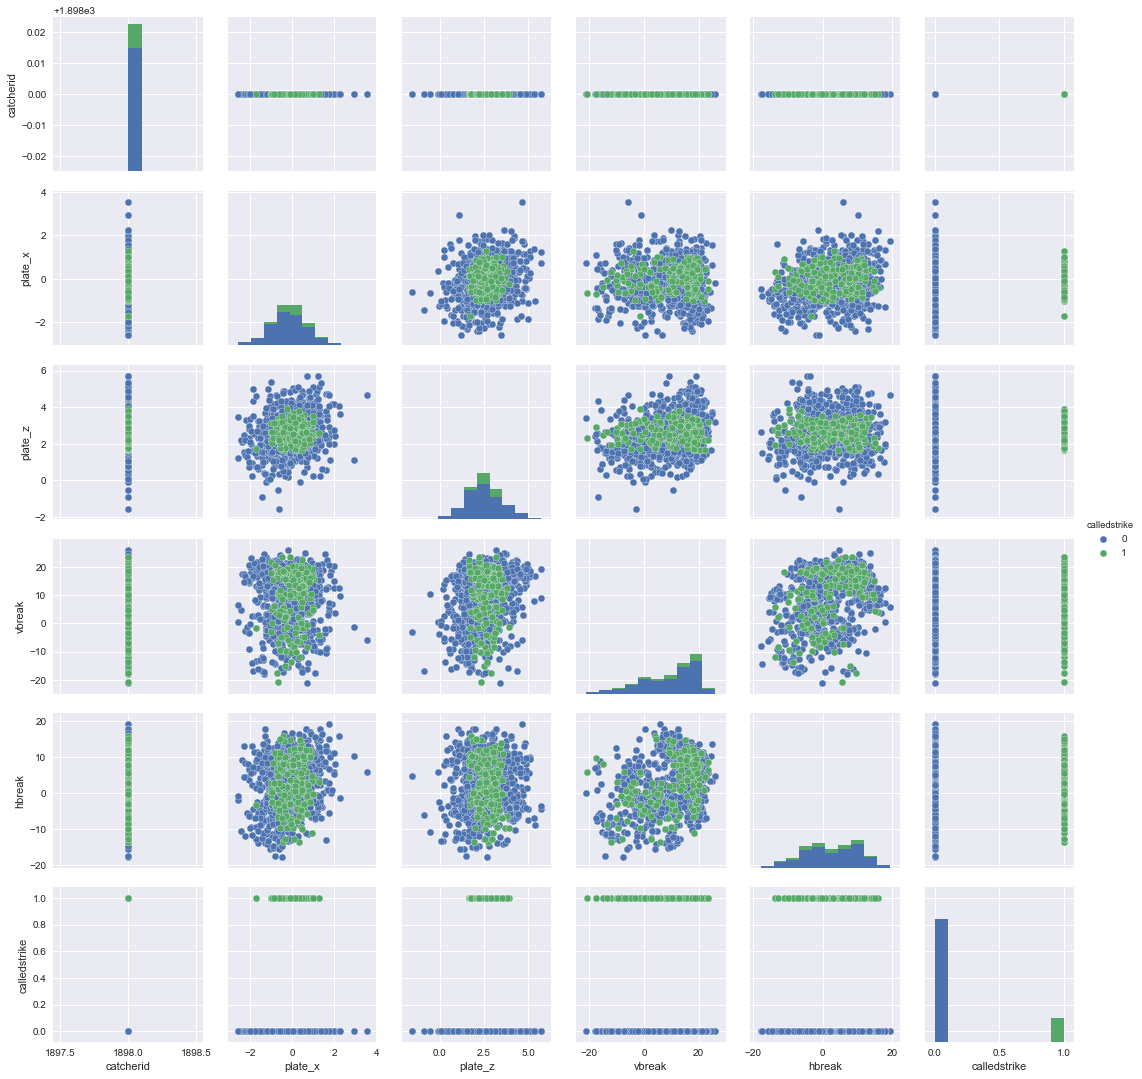

In [7]:
# The colours split the data into "called strike" and other. 

sns.pairplot(newdf, hue = "calledstrike")

In [12]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 4753 to 230025
Data columns (total 6 columns):
catcherid       966 non-null int64
plate_x         966 non-null float64
plate_z         966 non-null float64
vbreak          966 non-null float64
hbreak          966 non-null float64
calledstrike    966 non-null int64
dtypes: float64(4), int64(2)
memory usage: 92.8 KB


In [8]:
# Looking for all of the called strikes that aren't within the strike zone

A = (((newdf.calledstrike == 1) & (newdf.plate_x > 0.95)) != ((newdf.plate_z > 3.5) & (newdf.plate_z < 1.6)))
B = (((newdf.calledstrike == 1) & (newdf.plate_x < -0.95)) != ((newdf.plate_z > 3.5) & (newdf.plate_z < 1.6)))
C = ((newdf.calledstrike == 1) & (newdf.plate_z > 3.5))
D = ((newdf.calledstrike == 1) & (newdf.plate_z < 1.6))

In [9]:
A.value_counts()

False    960
True       6
dtype: int64

In [10]:
B.value_counts()

False    961
True       5
dtype: int64

In [11]:
C.value_counts()

False    959
True       7
dtype: int64

In [12]:
D.value_counts()

False    966
dtype: int64

### Exploratory Analysis Results

A B C and D describe a quadrant of the batter's plane that is not legally a strike. 
While looking at catcherid 1898, we can see that of the 966 pitches received, 18 of those pitches were framed. 
While all of this is being explored under the hood, a function will cast over the remainder of the catchers to determine best frame rates. 

In [13]:
#updating the DF only looking at features and framed ball criteria and allowing dataset to be indexed with this criteria

df1 = df.filter(["catcherid", "plate_x", "plate_z", "calledstrike"], axis = 1)
cs_index = (df['calledstrike']==1) & ((df['plate_x']>0.95)|(df['plate_x']<-0.95)|(df["plate_z"]>3.5)|(df["plate_z"]<1.6))
cs_strike = df[cs_index]

In [15]:
pd.set_option('display.max_rows', df.shape[0]+1)
df2 = cs_strike[['catcherid', 'calledstrike']]
df3 = df2.groupby("catcherid").sum().reset_index()
df3 = df3.sort_values('calledstrike', ascending=False)
print(df3)

     catcherid  calledstrike
34        2847           177
105      10615           156
117     126402           139
61        5241           135
60        5235           128
119     158409           125
96        9030           124
87        7745           123
49        4024           123
116     103943           119
12        1311           119
8          387           117
64        5404           108
32        2795           107
21        2060           103
51        4201           102
80        6574           102
73        6073            97
129     162226            97
14        1542            94
81        6829            87
115      93822            86
33        2831            82
84        7065            80
100       9541            78
132     163522            76
109      13359            76
17        1705            74
91        8032            73
89        7817            72
72        6049            71
126     160235            69
104      10540            68
135     165572

In [16]:
df_final = df.groupby('catcherid').agg({'calledstrike': 'count'}).reset_index().rename(
    columns={'calledstrike':'total'}).sort_values('total', ascending=False)

In [17]:
df_final = df_final.set_index('catcherid').join(df3.set_index('catcherid'))
df_final['frame rate'] = (df_final['calledstrike'] / df_final['total'])
df_final.loc[df_final['total'] > 2000].sort_values(by=["frame rate"], ascending = False)

# definition of frame rate: called strikes / total number of pitches caught, having caught at least 2000 pitches minimum

,total,calledstrike,frame rate
catcherid,,,
387,3911,117.0,0.029916
2847,6047,177.0,0.029271
6073,3594,97.0,0.026989
5241,5126,135.0,0.026336
6428,2027,50.0,0.024667
103943,4928,119.0,0.024148
4024,5219,123.0,0.023568
165572,2925,68.0,0.023248
126402,6018,139.0,0.023097


## Model predict and solve the problem
As a simple reminder, this was the problem we were asked; 

    "Which catcher was the most effective framer on a rate basis? Briefly describe (a paragraph or two) the process you used to come to this conclusion. Please include a .csv with every catcherid along with some measurement of framing skill (how you choose to convey this is up to you).
    
The determination of a frame rate is considered number of framed pitches divided by the total number of pitches having caught at least 2000 pitches total. 

According to this assumption, catcherid 387 had the best frame rate at 0.03 framed pitches per pitch. 

The significance of this is more evident when averaged out in one game. On average, 150 pitches are caught per game, which means 4.5 pitches are coerced into strikes which means the framing ability of the catcher can garner 1.5 outs on his own each game. Or to extend the projection, that's 3 complete games over the span of the entire season. When broken down like this, the significance speaks for itself, especially when there have been several tie-breaking wildcard races in recent years. Framing was often an under-appreciated and under-accounted stat that has only recently been recognized in sabrmetric driven sites like FanGraphs and Brooksbaseball.   

## Next steps

Although the original research question was interested in finding the best back catching framer, some of the visual exploratory analyses brings attention to some potential trends that may be worth investigating. Bringing attention back to the jointplot displayed on the 'Analyze and Describe the Data' portion above. 

1. plate_x vs hbreak
This may lead us to the idea that horizontal movement of the ball on the fringes of the strike zone may lead to called strike.

2. plate_z vs vbreak
Similarly to above, vertical movement of the ball on the fringe of the strike zone may lead to a called strike. 